# **Project Description: Autosuggest Feature Implementation with N-gram Models & Markov Chains**


## **Context**

In this project, we will solve an NLP problem category - **Autosuggesting text**.

We have been given a dataset which consists of emails sent by different users from the Enron corporation, so we are expected to create an Autosuggest engine that can suggest the next word to the user for a given input.

To create a text Autosuggest Engine, it is sufficient for our solution to the problem at this point, to merely predict the next word the user might enter using probabilistic approaches. This of course could result in increased convenience and ease of typing for the user. We will be solving this problem using 2 methods:

* Using N-grams and Probabilistic NLP

* Using N-Grams and the concept of Markov Chains

## **Notebook Content & Flow**

1. [Importing the Libraries 🚀](#import)


2. [Reading The Dataset 📖](#read_df)
    * [2.1 - Fetching the data of a particular user 👨](#fetch_user_data)
    

3. [Data Cleaning & Preprocessing 🧹](#clean_data)
    * [3.1 - Joining all the text as a single string 🕸️](#join)
    * [3.2 - Tokenizing the text 🔪](#tokenize)
    

4. [Implementing Autosuggest Using N-Grams and Probabilistic NLP 📊](#probability)
    * [4.1 - Suggesting Text 📜](#suggest_probability)
    

5. [Implementing Autosuggest Using N-Grams and the concept of Markov Chains ⛓️](#markov)
    * [5.1 - Suggesting Text 📜](#suggest_markov)

## **Setting up the notebook view**

In [1]:
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----
color_map = ['#6166B3', '#e8eff6', '#0b2553']

prompt = color_map[-1]
main_color = color_map[0]

css_file = '''

    div #notebook {
    background-color: white;
    line-height: 20px;
    }

    #notebook-container {
    %s
    margin-top: 2em;
    padding-top: 2em;
    border-top: 4px solid %s; /* light orange */
    -webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    }

    div .input {
    margin-bottom: 1em;
    }

    .rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
    color: %s; /* light orange */
    font-weight: 600;
    }

    div.input_area {
    border: none;
        background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
        border-top: 2px solid %s; /* light orange */
    }

    div.input_prompt {
    color: %s; /* light blue */
    }

    div.output_prompt {
    color: %s; /* strong orange */
    }

    div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
    background: %s; /* light orange */
    }

    div.cell.selected, div.cell.selected.jupyter-soft-selected {
        border-color: %s; /* light orange */
    }

    .edit_mode div.cell.selected:before {
    background: %s; /* light orange */
    }

    .edit_mode div.cell.selected {
    border-color: %s; /* light orange */

    }
    '''
def to_rgb(h):
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb():
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

## **GitHub repository URL**
## **https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-SubratMuruni.git**

<a id='import'></a>
## **Importing Libraries**

### **Q1: Import the necessary libraries and briefly explain the use of each library (10 marks)**

In [2]:
import pandas as pd

# Importing the numpy library
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

import regex as re

# Import Count Vectorizer from sklearn

from sklearn.feature_extraction.text import CountVectorizer

# From NLTK's tokenize subpackage import word_tokenize

from nltk.tokenize import word_tokenize

import networkx as nx

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## **Reading the DataFrame**

<a id='read_df'></a>
### **Q2: Read in the Dataframe using Pandas (5 marks)**

In [3]:
# Connect to google drive from Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the dataframe

df = pd.read_csv('/content/drive/My Drive/Artificial Neural Networks/DataSets/emaildata_100000_0.csv')

In [5]:
# Read the first 5 rows of the dataframe
df.head(5)

,Unnamed: 0,date,sender,recipient1,subject,text
0,0,2001-05-14 16:39:00-07:00,phillip.allen@enron.com,tim.belden@enron.com,NaN,"['', 'Here is our forecast', '', ' ']"
1,1,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,"['', 'Traveling to have a business meeting tak..."
2,2,2000-10-18 03:00:00-07:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,"['', 'test successful. way to go!!!']"
3,3,2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,NaN,"['', 'Randy,', '', ' Can you send me a schedul..."
4,4,2000-08-31 05:07:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,"['', ""Let's shoot for Tuesday at 11:45. ""]"


In [6]:
# find information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72932 entries, 0 to 72931
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72932 non-null  int64 
 1   date        72932 non-null  object
 2   sender      72932 non-null  object
 3   recipient1  72932 non-null  object
 4   subject     68075 non-null  object
 5   text        72932 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.3+ MB


The dataframe has 6 columns. The column of interest for our work is "Text".

In [7]:
# check the missing values/null in the dataset, which constists of mostly subjects.
df.isnull().sum()

Unnamed: 0       0
date             0
sender           0
recipient1       0
subject       4857
text             0
dtype: int64

we will not drop any null values as the column "Text" is our variable column.

In [8]:
# find null values in the dataset
df['text'].isna().any()

False

In [9]:
# find duplicate values in the text
df['text'].duplicated().sum()

30797

In [10]:
# Check for the unique values of the sender
df.sender.unique()

array(['phillip.allen@enron.com', 'ina.rangel@enron.com',
       '1.11913372.-2@multexinvestornetwork.com', ...,
       'info@energyinformation.org', 'mog.heu@enron.com',
       'daren.farmer@enron.com'], dtype=object)

<a id='fetch_user_data'></a>
### Q2.1 Fetching the text data of a particular user

Please find the text related to the sender email address - 'phillip.allen@enron.com'by completing the code below

In [11]:
# Fetch the text data of a particular user
df = df[df['sender']=='phillip.allen@enron.com'].astype(str)

# Convert the series to dataframe
df = pd.DataFrame(df, columns=['text'])

# Print the head of the series
df.head()

,text
0,"['', 'Here is our forecast', '', ' ']"
1,"['', 'Traveling to have a business meeting tak..."
2,"['', 'test successful. way to go!!!']"
3,"['', 'Randy,', '', ' Can you send me a schedul..."
4,"['', ""Let's shoot for Tuesday at 11:45. ""]"


In [12]:
# find the resulting data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 72314
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2086 non-null   object
dtypes: object(1)
memory usage: 32.6+ KB


The resulting dataframe with 2086 rows is being used for further model development as it is going to take a lot of time to process the entire data set.

<a id='clean_data'></a>
## **Data Cleaning - Text Preprocessing** ( 15 Marks)

### **Q3.1 : Perform Text Preprocessing in the following steps:** (5 Marks)

In [13]:
# function for cleaning the data.
def clean_text(text):
    # Remove all the elements except alphabets
    text = re.sub("[^a-zA-Z]",' ', text)

    # Replace multiple white spaces into single white space
    text = re.sub(' +', ' ', text)

    # Removing the whitespaces in the beginning and the end of text
    text = text.strip()

    # Lower the text alphabets
    text = text.lower()

    # Return the text
    return text

In [14]:
# Clean the text
df['text'] = df['text'].apply(clean_text)

# Show the cleaned text
df.head(10)

,text
0,here is our forecast
1,traveling to have a business meeting takes the...
2,test successful way to go
3,randy can you send me a schedule of the salary...
4,let s shoot for tuesday at
5,greg how about either next tuesday or thursday...
6,please cc the following distribution list with...
7,any morning between and
8,login pallen pw ke davis i don t think these a...
9,forwarded by phillip k allen hou ect on pm buc...


The resulting data has no special characters or numbers, white space has been removed and the entire corpus has been converted to lower case.

<a id='join'></a>
### **Q3.2: Join all the text into a single string (5 marks)**

In [15]:
# Join all the text as a single entity
text = ' '.join(df['text'])

# Show first 20 characters
text[0:20]

'here is our forecast'

<a id='tokenize'></a>
### **Q3.3: Tokenize the text (5 marks)**

In [16]:
# Tokenize the text
tokenized_text = word_tokenize(text)

# Show the first 10 tokens
tokenized_text[:10]

['here',
 'is',
 'our',
 'forecast',
 'traveling',
 'to',
 'have',
 'a',
 'business',
 'meeting']

<a id='probability'></a>
## **Creating N-gram Models (with Probability)**

### **Q4: Perform the following steps to create, visualize and implement N-grams to predict text:**

### **Q4.1: Complete the code to create N-grams (5 marks)**

In [18]:
# function to create n-grams
def create_ngrams(tokenized_text, ngrams):
    # This creates 3 lists and zips the 3 lists element-wise
    n_token_list = zip(*[tokenized_text[i:] for i in range(0,ngrams)])

    # This will join all the elements of tuple as a string
    ngrams_list = [' '.join(ngram) for ngram in n_token_list]

    # Return the n-grams
    return ngrams_list

### **Q4.2: Visualize the top 10 N-grams (5 marks)**

In [19]:
# Creating 1-gram, 2-gram, 3-gram and 4-gram from the existing data
i_gram = create_ngrams(tokenized_text, 1)
bi_gram = create_ngrams(tokenized_text, 2)
tri_gram = create_ngrams(tokenized_text, 3)
four_gram = create_ngrams(tokenized_text, 4)

# Fetching the top 10 most repeated n-grams
uni_gram = pd.Series(uni_gram).value_counts()[:10]
bi_gram = pd.Series(bi_gram).value_counts()[:10]
tri_gram = pd.Series(tri_gram).value_counts()[:10]
four_gram = pd.Series(four_gram).value_counts()[:10]

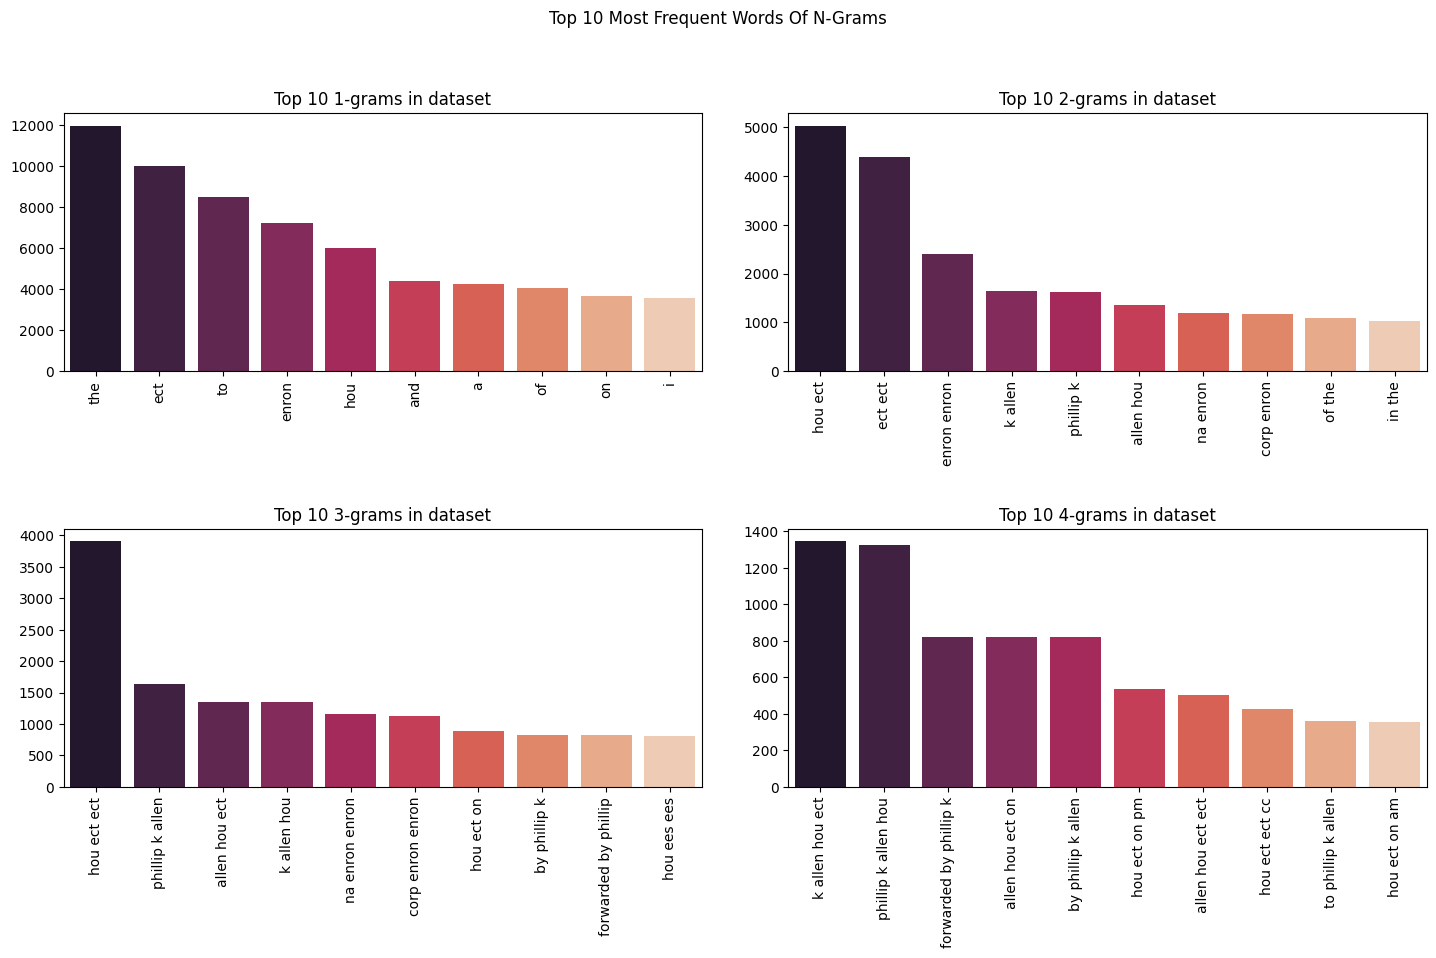

In [20]:
# Set the subtitle
fig, ax = plt.subplots(2,2, figsize=(15,10))

# Set the suptitle - main title
plt.suptitle("Top 10 Most Frequent Words Of N-Grams")

# Set the title, plot the graph and rotate the xlabels to 90 degrees
ax[0,0].set_title("Top 10 1-grams in dataset")
sns.barplot(data = uni_gram.reset_index(),x = uni_gram.index, y = uni_gram.values, ax=ax[0,0], palette='rocket')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90)

# Set the title, plot the graph and rotate the xlabels to 90 degrees
ax[0,1].set_title("Top 10 2-grams in dataset")
sns.barplot(bi_gram.reset_index(), x= bi_gram.index, y= bi_gram.values, ax=ax[0,1], palette='rocket')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

# Set the title, plot the graph and rotate the xlabels to 90 degrees
ax[1,0].set_title("Top 10 3-grams in dataset")
sns.barplot(data = tri_gram.reset_index(), x = tri_gram.index, y = tri_gram.values, ax=ax[1,0], palette='rocket')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

# Set the title, plot the graph and rotate the xlabels to 90 degrees
ax[1,1].set_title("Top 10 4-grams in dataset")
sns.barplot(data = four_gram.reset_index(), x= four_gram.index, y = four_gram.values, ax=ax[1,1], palette='rocket')
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

# Make some space between subplots and show
plt.tight_layout(pad=3)
plt.show()

The uni-gram provides data on the frequency of occurance of words, with "the", "etc","to" being the 3 most communly occuring words in the corpus

The bi-gram provides data on the co-occurance of two words within the corpus with hou etc, etc etc, enron enron, being the 3 most communly occuring bi-grams in the corpus.

Similarly the tri-gram and four-gram provide the co-occurnace of most common 3 word combination and 4 word combination in the corpus.

Looking at the data and evaluating it through our knowledge of English language, at first glance it seems that bi-gram would be a good approach for find the next context word.

In [21]:
# function to find the probabilities
def get_next_word(text, text_corpus,tokenized_text, ngrams):
    # Fetch the list of n-grams
    ngram_list = create_ngrams(tokenized_text, ngrams)

    # Fetch the ngram from input
    ngram_wo_token = ' '.join(text.split()[-ngrams:])

    # Create an empty dictionary to store word & probability
    word_probs = {}

    # Loop through each token
    for token in tqdm(set(tokenized_text)):
        # Create a str such that ngram + token
        ngram_w_token = ' '.join([ngram_wo_token, token])

        # Fetch the count of the created ngram with (numerator)
        ngram_w_token_count = text_corpus.count(ngram_w_token)

        # Fetch the token count(denominator)
        token_count = text_corpus.count(token)

        # Calculate the probability
        prob_x_token = ngram_w_token_count/token_count

        # Set a threshold value according to the results
        if prob_x_token > 0.005:
            # Add the probability to dictionary
            word_probs[token] = prob_x_token

    # Return the dictionary sorted by values in ascending manner
    return dict(reversed(sorted(word_probs.items(), key = lambda x:x[1])))

<a id='suggest_probability'></a>
## **Suggesting Text using these N-gram Models**

### **Q 4.4: Complete the code below by removing the spaces to prompt the N-gram model for suggestions (5 marks)**

In [22]:
# Calculate the probabilities of next words
uni_word_probs = get_next_word("i am", text, tokenized_text, 1)

bi_word_probs = get_next_word("i am", text, tokenized_text, 2)

tri_word_probs = get_next_word("i am the", text, tokenized_text, 3)

# Print the suggestions!
all_word_probs = [uni_word_probs, bi_word_probs, tri_word_probs]

for ngram, word_probs in enumerate(all_word_probs):
    print(f"---- {ngram+1}-ngram predictions ---- \n")
    print(word_probs)
    print("\n\n")

100%|██████████| 6531/6531 [00:24<00:00, 270.43it/s]

---- 1-ngram predictions ---- 

{'redick': 1.0, 'keiser': 1.0, 'selection': 1.0, 'leaning': 1.0, 'eliason': 1.0, 'faxing': 1.0, 'excited': 1.0, 'navsetup': 1.0, 'bending': 1.0, 'arteaga': 1.0, 'burson': 1.0, 'becton': 1.0, 'booked': 1.0, 'bidding': 1.0, 'envisioning': 1.0, 'tempted': 1.0, 'sending': 0.6666666666666666, 'nguyen': 0.6097560975609756, 'cdt': 0.5454545454545454, 'mime': 0.5, 'arsystem': 0.5, 'tandy': 0.5, 'fairly': 0.5, 'carla': 0.5, 'carlson': 0.5, 'advertisement': 0.5, 'continuing': 0.5, 'envision': 0.5, 'expecting': 0.45454545454545453, 'postmaster': 0.4, 'kristian': 0.4, 'tenron': 0.38028169014084506, 'unable': 0.36363636363636365, 'developing': 0.36363636363636365, 'cst': 0.36363636363636365, 'looking': 0.34545454545454546, 'mlenhart': 0.3333333333333333, 'rome': 0.3333333333333333, 'structuring': 0.3333333333333333, 'worried': 0.3333333333333333, 'skipping': 0.3333333333333333, 'kelly': 0.3076923076923077, 'concerned': 0.3076923076923077, 'carl': 0.2894736842105263, 

### **Q4.5: Write your observations below (5 marks)**

 The predictions are made from 6531 tokenized words.

 The Uni-gram word probability has 16 words with probability 1. However, using these words with respect to the input does make much sense symantically.

 the Bi-grams word probability has 9 word with probability 1 and every other word there after when used with the input words make grammatical sense. The bi-gram output for auto-suggest seems pretty robust.

 The tri-gram provides probability of a single word, with minuscle probability and doesn't seem to be a good approach to use for auto suggestion task.

<a id='markov'></a>
## **Using the Markov Model Approach**

### **Q5: Complete the following steps to build an approach that will create a Markov Chain that stores counts as transitions to implement an Autosuggest feature:**

### **Q5.1: Complete the code by removing the blank spaces (5 marks)**

In [23]:
# function for creating the Markov chain
def create_chain_w_count(tokenized_text, ngrams):
    # Creating a chain
    chain = {}

    # Get the size of the corpus
    n_words = len(tokenized_text)

    # Iterate through entire corpus
    for index, key1 in tqdm(enumerate(tokenized_text)):
        # Condition to avoid out of index error
        if n_words-index == ngrams+1:
            break

        # Fetch the next 'n' keys wrt ngrams
        next_n_keys = tokenized_text[index+1:index+ngrams]

        # Fetch the word, next to ngram, to add in the chain
        word = tokenized_text[index+ngrams]

        # Merge all the keys together
        all_keys = tuple([key1] + next_n_keys)

        # If states not in chain or if state exists and it doesn't have the word
        if all_keys not in chain:
            # Create an empty dictionary
            chain[all_keys] = {}

            # Add the words to the created dict
            chain[all_keys][word] = 1

        # If the state doesnot have that word
        elif word not in chain[all_keys].keys():
        # Add the words to the created dict
            chain[all_keys][word] = 1

        # If the state exists and the state has that word then increment
        else:
            chain[all_keys][word] += 1

    # Print the size of the chain
    print('Chain size: {} states, where each state is an n-gram.'.format(len(chain)))

    # Return the markov chain
    return chain

### **Q5.2: Create the Markov Chain (5 marks)**

In [24]:
# Create a markov chain of counts using Unigrams
mm_uni = create_chain_w_count(tokenized_text, 1)

# Create a markov chain of counts  using Bigrams
mm_bi = create_chain_w_count(tokenized_text, 2)

# Create a markov chain of counts using Trigrams
mm_tri = create_chain_w_count(tokenized_text, 3)

297460it [00:00, 709961.28it/s]


Chain size: 6531 states, where each state is an n-gram.


297459it [00:00, 660671.99it/s]


Chain size: 32038 states, where each state is an n-gram.


297458it [00:00, 655760.68it/s]

Chain size: 47168 states, where each state is an n-gram.


### **This code block converts the counts of the Markov Chain into probabilities**

In [25]:
# function to find the transition probabilities of the Markov chain
def transition_for_markov_model(mm):
    # Iterate through each state and its transition iterativey
    for current_state, transition in tqdm(mm.items()):
        # Get the sum of transition of state iteratively
        total = sum(transition.values())

        # For each word inside state calculate the probability/transition value
        for state, count in transition.items():
            mm[current_state][state] = count/total

    # Return the markov_model
    return mm

### **Q5.3: Complete the code below (5 marks)**

In [26]:
# Calculate the transition of the states
mm_uni = transition_for_markov_model(mm_uni)

# Calculate the transition of the states
mm_bi = transition_for_markov_model(mm_bi)

# Calculate the transition of the states
mm_tri = transition_for_markov_model(mm_tri)

100%|██████████| 47168/47168 [00:00<00:00, 542320.61it/s]


<a id='suggest_markov'></a>
### **Q5.4: Suggesting text (10 marks)**

In [27]:
# function for auto suggesting the next word
def get_suggestions(text, mm, ngrams):
    # Fetch the ngram from the input
    key = tuple(text.split()[-ngrams:])

    # Fetch the transition of the given state
    transitions = mm[key]

    # Convert to dataframe for bettwe view
    transition_df = pd.DataFrame(transitions.values(),
                                 index=transitions.keys(),
                                 columns=['probability'])

    # Sort the dataframe by Probability
    transition_df = transition_df.sort_values(by='probability', ascending=False)

    # Reset the index
    transition_df.reset_index(drop=True)

    # Return the suggestions
    return transition_df

In [28]:
mm_chains = [mm_uni, mm_bi, mm_tri]

# Enter your input here(kindly use lower case letters)
sentence = 'no i am'

for ngrams, mm in enumerate(mm_chains):
    print(f'---- {ngrams+1}-grams suggestions ----')
    print(get_suggestions(sentence, mm, ngrams+1))
    print('\n\n')

---- 1-grams suggestions ----
         probability
to          0.216216
t           0.124909
please      0.046749
going       0.038714
not         0.038714
...              ...
using       0.002191
just        0.002191
unclear     0.002191
and         0.002191
ended       0.001461

[102 rows x 1 columns]



---- 2-grams suggestions ----
             probability
going           0.120181
not             0.120181
still           0.056689
ready           0.054422
looking         0.043084
in              0.038549
sending         0.036281
planning        0.027211
on              0.024943
expecting       0.022676
sure            0.022676
back            0.018141
faxing          0.018141
unable          0.018141
concerned       0.018141
very            0.015873
trying          0.015873
willing         0.015873
out             0.013605
surprised       0.013605
pursuing        0.013605
excited         0.011338
bending         0.009070
leaning         0.009070
supposed        0.009070
open       

## **Observations and Recommendations**

### **Q6: Given the nature of the business problem being solved, what are your observations and recommendations as a Data Scientist regarding the applicability of this model, its potential use cases and likely drawbacks that would necessitate more complex models? (20 marks)**

We are trying to solve the business problem of auto suggest in email composition. The perceived benefits being.


*   reduce time and effort to compose emails and increase communication speed
*   reduce occurance of typos, spelling errors and grammatical mistakes
*   Improve overall professionalism and credibility of business communication


As our goal is to improve the efficiency of email composition by providing quick and accurate word suggestions to the user, the current methods of n-gram co-occruance and Markov chain is an introductory approach to the problem.

The models do a decent job of predicting the next work with bi-grams than with uni-gram or tri-gram. The model almost exclusively used a very small size corpus and lags computational power when implemented on the entire email corpus. However, for a larger corpus, to generate a more robust and accurate model, other complex models incorporating NN or RNN must be deployed.

The auto suggest feature has a number of real world application such as:


*   Chat bots (chatGPT)
*   Search Engines Augosuggest
*   Phone text messenger autosuggest
*   Source code editors
*   Auto correction and word processors









